In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
#Tokenizer
from pyspark.ml.feature import Tokenizer, StopWordsRemover

# Start Spark
#spark = SparkSession.builder.appName("TweetAnalysis").getOrCreate()
##.config("spark.sql.legacy.timeParserPolicy", "LEGACY") \  This piece of code was added because the time format is not compatible with this version
spark = SparkSession.builder \
    .appName("TweetAnalysis") \
    .config("spark.sql.legacy.timeParserPolicy", "LEGACY") \
    .getOrCreate()

# read CSV
df = spark.read.csv("hdfs:///hdfs/twitter/ProjectTweets.csv", header=False, inferSchema=True)


In [2]:
#show df
df.show()

+---+----------+--------------------+--------+---------------+--------------------+
|_c0|       _c1|                 _c2|     _c3|            _c4|                 _c5|
+---+----------+--------------------+--------+---------------+--------------------+
|  0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|  1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...|
|  2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...|
|  3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...|
|  4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...|
|  5|1467811372|Mon Apr 06 22:20:...|NO_QUERY|       joy_wolf|@Kwesidei not the...|
|  6|1467811592|Mon Apr 06 22:20:...|NO_QUERY|        mybirch|         Need a hug |
|  7|1467811594|Mon Apr 06 22:20:...|NO_QUERY|           coZZ|@LOLTrish hey  lo...|
|  8|1467811795|Mon Apr 06 22:20:...|NO_QUERY|2Hood4Hollywood|@Tatiana_K nop

In [3]:
# show schema
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: long (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)



In [4]:
# Rename columns name
df = df.withColumnRenamed("_c0", "number") \
        .withColumnRenamed("_c1", "ids") \
        .withColumnRenamed("_c2", "date") \
        .withColumnRenamed("_c3", "flag") \
        .withColumnRenamed("_c4", "user") \
        .withColumnRenamed("_c5", "text")

In [5]:
# show schema
df.printSchema()

root
 |-- number: integer (nullable = true)
 |-- ids: long (nullable = true)
 |-- date: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- user: string (nullable = true)
 |-- text: string (nullable = true)



In [6]:

#see the all text on the rows
df.select("text").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                 |
+---------------------------------------------------------------------------------------------------------------------+
|@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  |
|is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!      |
|@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds                            |
|my whole body feels itchy and like its on fire                                                                       |
|@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.       |
|@Kwesidei not the whole crew           

# Comments;
There are unneccesary punctaion marks, hastags and stop words

In [7]:
data= df.select("date", "text")
data.show()

+--------------------+--------------------+
|                date|                text|
+--------------------+--------------------+
|Mon Apr 06 22:19:...|@switchfoot http:...|
|Mon Apr 06 22:19:...|is upset that he ...|
|Mon Apr 06 22:19:...|@Kenichan I dived...|
|Mon Apr 06 22:19:...|my whole body fee...|
|Mon Apr 06 22:19:...|@nationwideclass ...|
|Mon Apr 06 22:20:...|@Kwesidei not the...|
|Mon Apr 06 22:20:...|         Need a hug |
|Mon Apr 06 22:20:...|@LOLTrish hey  lo...|
|Mon Apr 06 22:20:...|@Tatiana_K nope t...|
|Mon Apr 06 22:20:...|@twittera que me ...|
|Mon Apr 06 22:20:...|spring break in p...|
|Mon Apr 06 22:20:...|I just re-pierced...|
|Mon Apr 06 22:20:...|@caregiving I cou...|
|Mon Apr 06 22:20:...|@octolinz16 It it...|
|Mon Apr 06 22:20:...|@smarrison i woul...|
|Mon Apr 06 22:20:...|@iamjazzyfizzle I...|
|Mon Apr 06 22:20:...|Hollis' death sce...|
|Mon Apr 06 22:20:...|about to file taxes |
|Mon Apr 06 22:20:...|@LettyA ahh ive a...|
|Mon Apr 06 22:20:...|@FakerPatt

# Data Cleaning

In [8]:
# convert uppercase letters to lowercase
data = data.withColumn("text", lower(col("text")))  
data.show()

+--------------------+--------------------+
|                date|                text|
+--------------------+--------------------+
|Mon Apr 06 22:19:...|@switchfoot http:...|
|Mon Apr 06 22:19:...|is upset that he ...|
|Mon Apr 06 22:19:...|@kenichan i dived...|
|Mon Apr 06 22:19:...|my whole body fee...|
|Mon Apr 06 22:19:...|@nationwideclass ...|
|Mon Apr 06 22:20:...|@kwesidei not the...|
|Mon Apr 06 22:20:...|         need a hug |
|Mon Apr 06 22:20:...|@loltrish hey  lo...|
|Mon Apr 06 22:20:...|@tatiana_k nope t...|
|Mon Apr 06 22:20:...|@twittera que me ...|
|Mon Apr 06 22:20:...|spring break in p...|
|Mon Apr 06 22:20:...|i just re-pierced...|
|Mon Apr 06 22:20:...|@caregiving i cou...|
|Mon Apr 06 22:20:...|@octolinz16 it it...|
|Mon Apr 06 22:20:...|@smarrison i woul...|
|Mon Apr 06 22:20:...|@iamjazzyfizzle i...|
|Mon Apr 06 22:20:...|hollis' death sce...|
|Mon Apr 06 22:20:...|about to file taxes |
|Mon Apr 06 22:20:...|@lettya ahh ive a...|
|Mon Apr 06 22:20:...|@fakerpatt

# Comments;
Uppercase and lowercase letters have different codes. All of them were converted to lowercase letters to prevent confusion. The same expressions will produce similar values.

In [9]:
# removel of special symbols and unnecessary symbols
data = data.withColumn("text", regexp_replace(col("text"), r'[^\w\s]', ''))
# to see all texts
data.show(truncate=False)

+----------------------------+-------------------------------------------------------------------------------------------------------------+
|date                        |text                                                                                                         |
+----------------------------+-------------------------------------------------------------------------------------------------------------+
|Mon Apr 06 22:19:45 PDT 2009|switchfoot httptwitpiccom2y1zl  awww thats a bummer  you shoulda got david carr of third day to do it d      |
|Mon Apr 06 22:19:49 PDT 2009|is upset that he cant update his facebook by texting it and might cry as a result  school today also blah    |
|Mon Apr 06 22:19:53 PDT 2009|kenichan i dived many times for the ball managed to save 50  the rest go out of bounds                       |
|Mon Apr 06 22:19:57 PDT 2009|my whole body feels itchy and like its on fire                                                               |
|Mon Apr 06 2

 # Comments;
Special symbols and unnecessary characters were removed to improve model performance and prevent analysis inconsistency.

In [10]:
# Replace multiple spaces with a single spac
data = data.withColumn("text", regexp_replace(col("text"), r'\s+', ' '))

# Comments;
Replace multiple spece with a simple space to improve model performance and notebook performance

In [11]:
from pyspark.ml.feature import Tokenizer
# Tokinazation
tokenizer = Tokenizer(inputCol="text", outputCol="words")
data = tokenizer.transform(data)

# show the results
data.select("text", "words").show()

+--------------------+--------------------+
|                text|               words|
+--------------------+--------------------+
|switchfoot httptw...|[switchfoot, http...|
|is upset that he ...|[is, upset, that,...|
|kenichan i dived ...|[kenichan, i, div...|
|my whole body fee...|[my, whole, body,...|
|nationwideclass n...|[nationwideclass,...|
|kwesidei not the ...|[kwesidei, not, t...|
|         need a hug |      [need, a, hug]|
|loltrish hey long...|[loltrish, hey, l...|
|tatiana_k nope th...|[tatiana_k, nope,...|
|twittera que me m...|[twittera, que, m...|
|spring break in p...|[spring, break, i...|
|i just repierced ...|[i, just, repierc...|
|caregiving i coul...|[caregiving, i, c...|
|octolinz16 it it ...|[octolinz16, it, ...|
|smarrison i would...|[smarrison, i, wo...|
|iamjazzyfizzle i ...|[iamjazzyfizzle, ...|
|hollis death scen...|[hollis, death, s...|
|about to file taxes |[about, to, file,...|
|lettya ahh ive al...|[lettya, ahh, ive...|
|fakerpattypattz o...|[fakerpatt

# Comments;
To separate text data into words and then perform further analysis on those words

In [12]:
from pyspark.ml.feature import StopWordsRemover
# Remove stop words
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
data = remover.transform(data)

In [13]:
data.show(5)

+--------------------+--------------------+--------------------+--------------------+
|                date|                text|               words|      filtered_words|
+--------------------+--------------------+--------------------+--------------------+
|Mon Apr 06 22:19:...|switchfoot httptw...|[switchfoot, http...|[switchfoot, http...|
|Mon Apr 06 22:19:...|is upset that he ...|[is, upset, that,...|[upset, cant, upd...|
|Mon Apr 06 22:19:...|kenichan i dived ...|[kenichan, i, div...|[kenichan, dived,...|
|Mon Apr 06 22:19:...|my whole body fee...|[my, whole, body,...|[whole, body, fee...|
|Mon Apr 06 22:19:...|nationwideclass n...|[nationwideclass,...|[nationwideclass,...|
+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



# Comments;
Meaningless words were removed. Both model performance and notebook performance will increase.

In [14]:
pip install spark-nlp

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from nltk.stem.snowball import SnowballStemmer

# Snowball Stemmer'ı (Porter2 Stemmer'ın gelişmiş versiyonu) kullanıyoruz.
stemmer = SnowballStemmer(language='english')

# Stemming işlemini yapacak fonksiyon
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# UDF (User Defined Function) oluşturma
stemming_udf = udf(stem_words, ArrayType(StringType()))

# Dataframe'deki kelimeleri stemleyerek yeni bir sütun oluşturma
data_stemmed = data.withColumn("stemmed_words", stemming_udf(data["filtered_words"]))

data_stemmed.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+
|                date|                text|               words|      filtered_words|       stemmed_words|
+--------------------+--------------------+--------------------+--------------------+--------------------+
|Mon Apr 06 22:19:...|switchfoot httptw...|[switchfoot, http...|[switchfoot, http...|[switchfoot, http...|
|Mon Apr 06 22:19:...|is upset that he ...|[is, upset, that,...|[upset, cant, upd...|[upset, cant, upd...|
|Mon Apr 06 22:19:...|kenichan i dived ...|[kenichan, i, div...|[kenichan, dived,...|[kenichan, dive, ...|
|Mon Apr 06 22:19:...|my whole body fee...|[my, whole, body,...|[whole, body, fee...|[whole, bodi, fee...|
|Mon Apr 06 22:19:...|nationwideclass n...|[nationwideclass,...|[nationwideclass,...|[nationwideclass,...|
|Mon Apr 06 22:20:...|kwesidei not the ...|[kwesidei, not, t...|[kwesidei, whole,...|[kwesidei, whole,...|
|Mon Apr 06 22:20:...|         need a

In [17]:
data_stemmed.select("stemmed_words").show(5, truncate=False)

+-----------------------------------------------------------------------------------------------+
|stemmed_words                                                                                  |
+-----------------------------------------------------------------------------------------------+
|[switchfoot, httptwitpiccom2y1zl, awww, that, bummer, shoulda, got, david, carr, third, day, d]|
|[upset, cant, updat, facebook, text, might, cri, result, school, today, also, blah]            |
|[kenichan, dive, mani, time, ball, manag, save, 50, rest, go, bound]                           |
|[whole, bodi, feel, itchi, like, fire]                                                         |
|[nationwideclass, behav, im, mad, cant, see]                                                   |
+-----------------------------------------------------------------------------------------------+
only showing top 5 rows



In [18]:
from pyspark.sql.functions import explode, col

# Parsing words in column '
word_frequency = (data_stemmed.withColumn("word", explode(col("stemmed_words")))
                  .groupBy("word").count()
                  .sort(col("count").desc()))

# first 20
word_frequency.show(20)

+-----+------+
| word| count|
+-----+------+
|   im|178358|
|   go|137021|
|  get|109958|
|  day|101303|
| good| 90566|
| work| 85270|
| like| 82962|
| love| 81102|
| dont| 67300|
|today| 66101|
| time| 64341|
| cant| 62884|
|  got| 61106|
|thank| 57918|
| want| 57049|
| back| 56398|
| miss| 56299|
|  one| 55903|
|  lol| 55350|
| know| 54053|
+-----+------+
only showing top 20 rows



In [19]:
# Wordcloud visulation

In [20]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


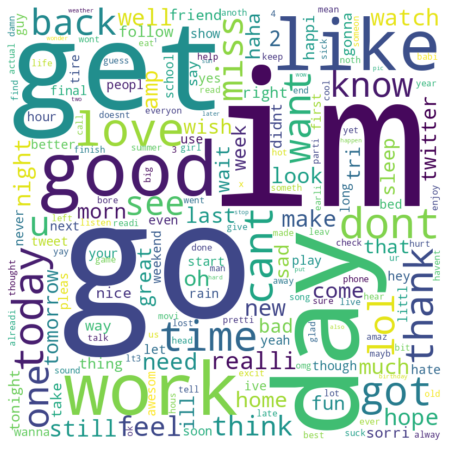

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Kelime frekanslarını bir sözlük olarak al
word_freq_dict = {row['word']: row['count'] for row in word_frequency.collect()}

# Kelime bulutunu oluştur
wordcloud = WordCloud(background_color="white", width=800, height=800).generate_from_frequencies(word_freq_dict)


# Görseli göster
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentimental Analysis

In [22]:
# VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from pyspark.sql.types import StringType, FloatType

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hduser/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
# Dfunction for sentimental analysis
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "positive"
    elif score['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

sentiment_udf = udf(get_sentiment, StringType())

# add result as a columns
df2 = df.withColumn("sentiment", sentiment_udf(df["text"]))

In [24]:
# Dfunction for sentimental analysis
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "positive"
    elif score['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

sentiment_udf = udf(get_sentiment, StringType())
sentiment_score_udf = udf(get_sentiment_score, FloatType())

# Add result as columns
df2 = df.withColumn("sentiment", sentiment_udf(df["text"]))
df2 = df2.withColumn("sentiment_score", sentiment_score_udf(df["text"]))

In [25]:

df2.show(5)

2023-11-11 11:38:19,234 WARN scheduler.DAGScheduler: Broadcasting large task binary with size 1168.3 KiB


+------+----------+--------------------+--------+---------------+--------------------+---------+---------------+
|number|       ids|                date|    flag|           user|                text|sentiment|sentiment_score|
+------+----------+--------------------+--------+---------------+--------------------+---------+---------------+
|     0|1467810369|Mon Apr 06 22:19:...|NO_QUERY|_TheSpecialOne_|@switchfoot http:...|  neutral|        -0.0173|
|     1|1467810672|Mon Apr 06 22:19:...|NO_QUERY|  scotthamilton|is upset that he ...| negative|          -0.75|
|     2|1467810917|Mon Apr 06 22:19:...|NO_QUERY|       mattycus|@Kenichan I dived...| positive|         0.4939|
|     3|1467811184|Mon Apr 06 22:19:...|NO_QUERY|        ElleCTF|my whole body fee...| negative|          -0.25|
|     4|1467811193|Mon Apr 06 22:19:...|NO_QUERY|         Karoli|@nationwideclass ...| negative|        -0.6597|
+------+----------+--------------------+--------+---------------+--------------------+---------+

In [26]:
#calculate sentiment
sentiment_counts = df2.groupBy("sentiment").count().collect()
sentiment_dict = {row['sentiment']: row['count'] for row in sentiment_counts}

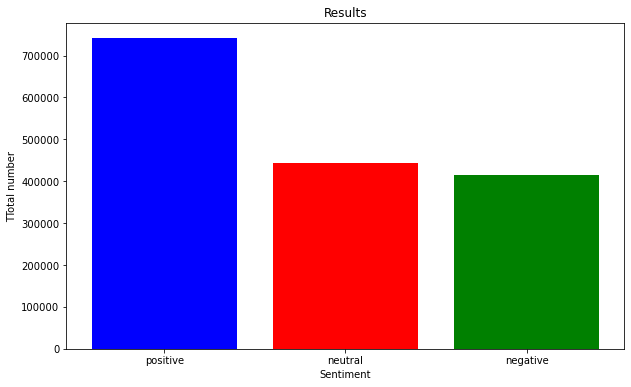

In [27]:
import matplotlib.pyplot as plt


labels = list(sentiment_dict.keys())
values = list(sentiment_dict.values())

#graph
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('TTotal number')
plt.title('Results')
plt.show()

# Date Format

In [28]:
#check date fromat
df2.select("date").show(2,truncate=False)

+----------------------------+
|date                        |
+----------------------------+
|Mon Apr 06 22:19:45 PDT 2009|
|Mon Apr 06 22:19:49 PDT 2009|
+----------------------------+
only showing top 2 rows



In [29]:
df3 = df2.select("date", "sentiment_score")

In [30]:
from pyspark.sql.functions import from_utc_timestamp, unix_timestamp
import pyspark.sql.functions as F

In [31]:
# date format
custom_date_format = "EEE MMM dd HH:mm:ss zzz yyyy"

# Tcovert date
df3 = df3.withColumn("date", from_utc_timestamp(unix_timestamp("date", custom_date_format).cast("timestamp"), "PST"))\
        .withColumn("date_only", F.date_format("date", "yyyy-MM-dd"))

# results
df3.show(truncate=False)

+-------------------+---------------+----------+
|date               |sentiment_score|date_only |
+-------------------+---------------+----------+
|2009-04-06 23:19:45|-0.0173        |2009-04-06|
|2009-04-06 23:19:49|-0.75          |2009-04-06|
|2009-04-06 23:19:53|0.4939         |2009-04-06|
|2009-04-06 23:19:57|-0.25          |2009-04-06|
|2009-04-06 23:19:57|-0.6597        |2009-04-06|
|2009-04-06 23:20:00|0.0            |2009-04-06|
|2009-04-06 23:20:03|0.4767         |2009-04-06|
|2009-04-06 23:20:03|0.745          |2009-04-06|
|2009-04-06 23:20:05|0.0            |2009-04-06|
|2009-04-06 23:20:09|0.0            |2009-04-06|
|2009-04-06 23:20:16|0.0            |2009-04-06|
|2009-04-06 23:20:17|0.0            |2009-04-06|
|2009-04-06 23:20:19|-0.5994        |2009-04-06|
|2009-04-06 23:20:19|-0.1027        |2009-04-06|
|2009-04-06 23:20:20|0.3724         |2009-04-06|
|2009-04-06 23:20:20|0.4545         |2009-04-06|
|2009-04-06 23:20:22|-0.9081        |2009-04-06|
|2009-04-06 23:20:25

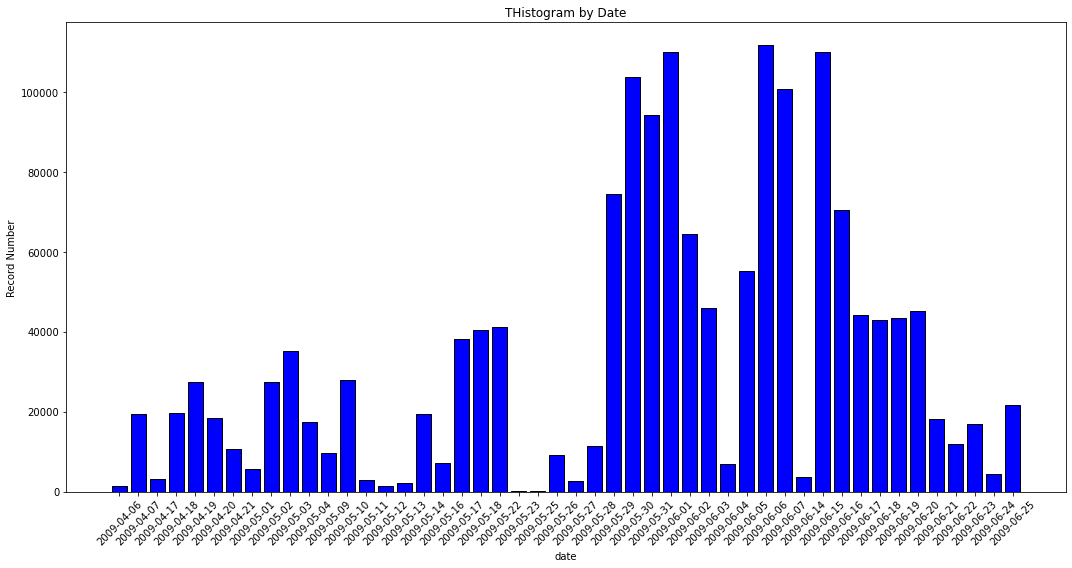

In [32]:
# Group by and calculate
date_counts = df3.groupBy("date_only").agg(count("*").alias("record_count")).orderBy("date_only").collect()

dates = [row['date_only'] for row in date_counts]
record_counts = [row['record_count'] for row in date_counts]

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.bar(dates, record_counts, color='blue', edgecolor='black')
plt.xlabel('date')
plt.ylabel('Record Number')
plt.title('THistogram by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
#calculate daily avarege
from pyspark.sql.functions import avg

daily_avg_scores = df3.groupBy("date_only").agg(avg("sentiment_score").alias("average_daily_score"))

In [34]:

daily_avg_scores.show()

+----------+--------------------+
| date_only| average_daily_score|
+----------+--------------------+
|2009-06-23| -0.0523871250517186|
|2009-04-06| 0.12738093083066326|
|2009-04-18|  0.1806716228546142|
|2009-05-04|  0.1627280340898782|
|2009-06-20|-0.03973196214079881|
|2009-05-01| 0.17771831629457127|
|2009-05-27| 0.15890210188403636|
|2009-04-19| 0.18538910644492312|
|2009-05-16| 0.17240091521977308|
|2009-05-25| 0.18012899297052587|
|2009-06-18|-0.05085764295889928|
|2009-05-29|  0.1840205703698618|
|2009-06-04| 0.16108441617569585|
|2009-04-20| 0.17359484014697346|
|2009-06-03| 0.17201150718961333|
|2009-04-07| 0.16099774803387365|
|2009-04-21| 0.17187242661030916|
|2009-05-22|  0.1961755080832209|
|2009-06-22|-0.06447462719948202|
|2009-05-03|   0.173228824253647|
+----------+--------------------+
only showing top 20 rows



In [35]:
daily_avg_scores = daily_avg_scores.orderBy("date_only")

In [36]:
# firs date
first_date = daily_avg_scores.select("date_only").first()
print("First date:", first_date["date_only"])

# last date
last_date = daily_avg_scores.select("date_only").tail(1)[0]
print("Last Date:", last_date["date_only"])

First date: 2009-04-06


Last Date: 2009-06-25


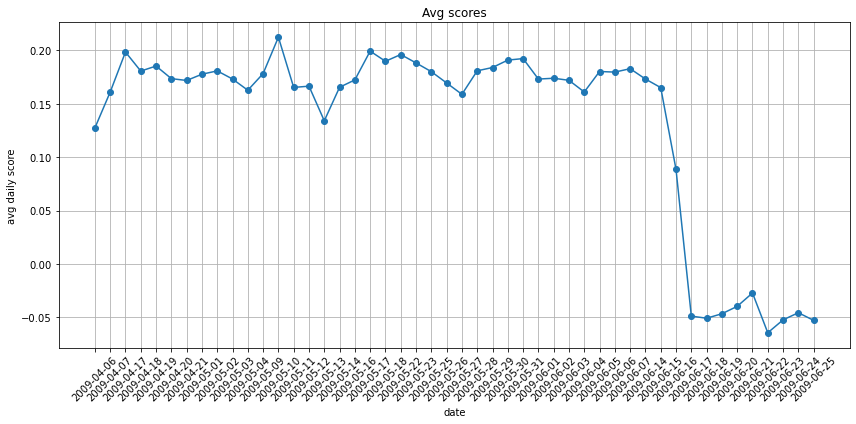

In [37]:
# convert to RDD ( RDD make easy to visulazation )
rdd = daily_avg_scores.rdd.map(tuple)


dates = rdd.map(lambda x: x[0]).collect()
scores = rdd.map(lambda x: x[1]).collect()

# plot
plt.figure(figsize=(12,6))
plt.plot(dates, scores, marker='o')
plt.title('Avg scores')
plt.xlabel('date')
plt.ylabel('avg daily score')
plt.grid(True)

 # rotate x axis
plt.xticks(rotation=45) 
plt.tight_layout()

# show graph
plt.show()

 # Investigation about break point


In [38]:
df_break = df2.select("date", "text")

In [39]:
# date format
custom_date_format = "EEE MMM dd HH:mm:ss zzz yyyy"

# Tcovert date
df_break = df_break.withColumn("date", from_utc_timestamp(unix_timestamp("date", custom_date_format).cast("timestamp"), "PST"))\
        .withColumn("date_only", F.date_format("date", "yyyy-MM-dd"))

In [40]:
df_break.show()

+-------------------+--------------------+----------+
|               date|                text| date_only|
+-------------------+--------------------+----------+
|2009-04-06 23:19:45|@switchfoot http:...|2009-04-06|
|2009-04-06 23:19:49|is upset that he ...|2009-04-06|
|2009-04-06 23:19:53|@Kenichan I dived...|2009-04-06|
|2009-04-06 23:19:57|my whole body fee...|2009-04-06|
|2009-04-06 23:19:57|@nationwideclass ...|2009-04-06|
|2009-04-06 23:20:00|@Kwesidei not the...|2009-04-06|
|2009-04-06 23:20:03|         Need a hug |2009-04-06|
|2009-04-06 23:20:03|@LOLTrish hey  lo...|2009-04-06|
|2009-04-06 23:20:05|@Tatiana_K nope t...|2009-04-06|
|2009-04-06 23:20:09|@twittera que me ...|2009-04-06|
|2009-04-06 23:20:16|spring break in p...|2009-04-06|
|2009-04-06 23:20:17|I just re-pierced...|2009-04-06|
|2009-04-06 23:20:19|@caregiving I cou...|2009-04-06|
|2009-04-06 23:20:19|@octolinz16 It it...|2009-04-06|
|2009-04-06 23:20:20|@smarrison i woul...|2009-04-06|
|2009-04-06 23:20:20|@iamjaz

In [41]:
filtered_df = df_break.filter(df_break.date_only == "2009-06-16")
filtered_df.select("text").show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------------------+
|my good news week prodcasts wont download!                                                                                                       |
|nah i couldnt come up with anything  maybe next time                                                                                             |
|@briannahyacinth I was really bummed out. When I read &quot;black music that black people don't like anymore&quot; it described me perfectly  lol|
|Whyyyy?                                                                                                        

In [42]:
# last 20
filtered_df.orderBy("date_only", ascending=False).show(20, truncate=False)

# count row
total_rows = filtered_df.count()
print(f"Total row: {total_rows}")

+-------------------+-------------------------------------------------------------------------------------------------------------------------------+----------+
|date               |text                                                                                                                           |date_only |
+-------------------+-------------------------------------------------------------------------------------------------------------------------------+----------+
|2009-06-16 00:00:00|@kutless you guys are awesome. God bless                                                                                       |2009-06-16|
|2009-06-16 00:00:00|Summer thunderstorms                                                                                                           |2009-06-16|
|2009-06-16 00:00:00|long tiringgg day! :[ but i love my new job!                                                                                   |2009-06-16|
|2009-06-16 00:00:01|@danyocumming

Total row: 70536


In [43]:
#random 20 samples
sampled_df = filtered_df.sample(withReplacement=False, fraction=0.1)
sampled_df.show(20, truncate=False)

+-------------------+--------------------------------------------------------------------------------------------------------------------------------------------+----------+
|date               |text                                                                                                                                        |date_only |
+-------------------+--------------------------------------------------------------------------------------------------------------------------------------------+----------+
|2009-06-16 00:00:51|Shit... I booked my return ticket for 19th thinking that headstartsummer is on 19th.. Talk of bad timing sense..                            |2009-06-16|
|2009-06-16 00:01:26|Well that's that-I am now girlfriendless and home alone until next friday                                                                   |2009-06-16|
|2009-06-16 00:01:39|Morning already???                                                                                           

# Comments;
There is no intresting issue on this date.



# Pandemi issue (H1N1)

In [44]:
# At the same time there is a pandemic on the world. I'll investigate this issue.
from pyspark.sql.functions import col, lower

# BConvert all to  lower
search_terms = ["virus", "H1N1", "pandemic", "health", "vacation", "mask","influenza"]

filtered_for_terms_df = filtered_df.filter(
    lower(col("text")).like("%virus%") | 
    lower(col("text")).like("%H1N1%") | 
    lower(col("text")).like("%pandemic%") |
    lower(col("text")).like("%health%") | 
    lower(col("text")).like("%vacation%") |
    lower(col("text")).like("%mask%") |
    lower(col("text")).like("%influenza%") 
)

count_of_terms = filtered_for_terms_df.count()

print(f"total number {count_of_terms}")

total number 331


# Comments; 
total twiit 70536 . there are 331 twiit about H1N1. 

In [45]:
# At the same time there is a pandemic on the world. I'll investigate this issue.
from pyspark.sql.functions import col, lower

# BConvert all to  lower
search_terms = ["virus", "H1N1", "pandemic", "health", "vacation", "mask","influenza"]

filtered_for_terms_df = df2.filter(
    lower(col("text")).like("%virus%") | 
    lower(col("text")).like("%H1N1%") | 
    lower(col("text")).like("%pandemic%") |
    lower(col("text")).like("%health%") | 
    lower(col("text")).like("%vacation%") |
    lower(col("text")).like("%mask%") |
    lower(col("text")).like("%influenza%") 
)

count_of_terms = filtered_for_terms_df.count()

print(f"total number {count_of_terms}")

total number 6012


# Comments;
 there are 6012 twit in the all datasets

# Interpolation

In [46]:
daily_avg_scores.show()

+----------+-------------------+
| date_only|average_daily_score|
+----------+-------------------+
|2009-04-06|0.12738093083066326|
|2009-04-07|0.16099774803387365|
|2009-04-17|0.19849672474708221|
|2009-04-18| 0.1806716228546142|
|2009-04-19|0.18538910644492312|
|2009-04-20|0.17359484014697346|
|2009-04-21|0.17187242661030916|
|2009-05-01|0.17771831629457127|
|2009-05-02|0.18085349485691582|
|2009-05-03|  0.173228824253647|
|2009-05-04| 0.1627280340898782|
|2009-05-09| 0.1783089752353694|
|2009-05-10|0.21242565345032235|
|2009-05-11|0.16535234033184282|
|2009-05-12|0.16653762034185535|
|2009-05-13|0.13409188681847287|
|2009-05-14|0.16551201895130432|
|2009-05-16|0.17240091521977308|
|2009-05-17| 0.1993562617409856|
|2009-05-18|0.18985307450519054|
+----------+-------------------+
only showing top 20 rows



In [47]:
from pyspark.sql.functions import mean

# average scores
average_score = daily_avg_scores.select(mean("average_daily_score")).collect()[0][0]
print("Mean Value:", average_score)

Mean Value: 0.13206959149649597


In [48]:
# VMean Value: 0.13206959149649597

In [49]:
from pyspark.sql.functions import stddev, count

# Veri setinizdeki 'average_daily_score' sütununun standart sapmasını hesaplayın
std_dev = daily_avg_scores.select(stddev("average_daily_score")).collect()[0][0]

print("Standard deviation:", std_dev)

Standard deviation: 0.08938657711095364


In [50]:
#Standard deviation: 0.08938657711095364

# Linear Interpolation

In [51]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
import pyspark.sql.functions as F
from datetime import datetime, timedelta
from pyspark.sql.window import Window

spark = SparkSession.builder.appName("Interpolation").getOrCreate()

# 'order data set based on date_only
daily_avg_scores = daily_avg_scores.orderBy("date_only")

# first and last date
start_date_str = daily_avg_scores.agg(F.min("date_only")).collect()[0][0]
end_date_str = daily_avg_scores.agg(F.max("date_only")).collect()[0][0]

# conver to date format
start_date = datetime.strptime(start_date_str, '%Y-%m-%d').date()
end_date = datetime.strptime(end_date_str, '%Y-%m-%d').date()

# lsit of null value
date_list = [Row(date_only=(start_date + timedelta(days=x)).strftime('%Y-%m-%d')) for x in range(0, (end_date-start_date).days + 1)]
all_dates_df = spark.createDataFrame(date_list)

# mrged datasets
df_merged = all_dates_df.join(daily_avg_scores, on="date_only", how="left_outer")

# windows
window_spec_prev = Window.orderBy("date_only").rowsBetween(Window.unboundedPreceding, -1)
window_spec_next = Window.orderBy("date_only").rowsBetween(0, Window.unboundedFollowing)

# pervious and next values
df_with_prev_next = df_merged.withColumn("prev_value", F.last("average_daily_score", ignorenulls=True).over(window_spec_prev))
df_with_prev_next = df_with_prev_next.withColumn("next_value", F.first("average_daily_score", ignorenulls=True).over(window_spec_next))

# Linear interpolasyon
df_interpolated = df_with_prev_next.withColumn(
    "interpolated_score",
    F.when(F.col("average_daily_score").isNotNull(), F.col("average_daily_score"))
    .otherwise((F.col("prev_value") + F.col("next_value")) / 2)
)

df_interpolated.show()


2023-11-11 11:44:26,578 WARN window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+-------------------+-------------------+-------------------+-------------------+
| date_only|average_daily_score|         prev_value|         next_value| interpolated_score|
+----------+-------------------+-------------------+-------------------+-------------------+
|2009-04-06|0.12738093083066326|               null|0.12738093083066326|0.12738093083066326|
|2009-04-07|0.16099774803387365|0.12738093083066326|0.16099774803387365|0.16099774803387365|
|2009-04-08|               null|0.16099774803387365|0.19849672474708221|0.17974723639047793|
|2009-04-09|               null|0.16099774803387365|0.19849672474708221|0.17974723639047793|
|2009-04-10|               null|0.16099774803387365|0.19849672474708221|0.17974723639047793|
|2009-04-11|               null|0.16099774803387365|0.19849672474708221|0.17974723639047793|
|2009-04-12|               null|0.16099774803387365|0.19849672474708221|0.17974723639047793|
|2009-04-13|               null|0.16099774803387365|0.1984967247470822

In [52]:
# mean value of intepolated values
interpolated_mean = df_interpolated.select(mean("interpolated_score")).collect()[0][0]
print("mean Value", interpolated_mean)

# İStandard deviation of interpolated values
interpolated_stddev = df_interpolated.select(stddev("interpolated_score")).collect()[0][0]
print("standart deviation", interpolated_stddev)

2023-11-11 11:45:23,616 WARN window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
2023-11-11 11:46:19,227 WARN window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


mean Value 0.15077665527778059


standart deviation 0.07227548139595283


In [53]:
# Mean Value=  0.15077665527778059
# standart deviation 0.07227548139595283

2023-11-11 11:55:25,538 WARN window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


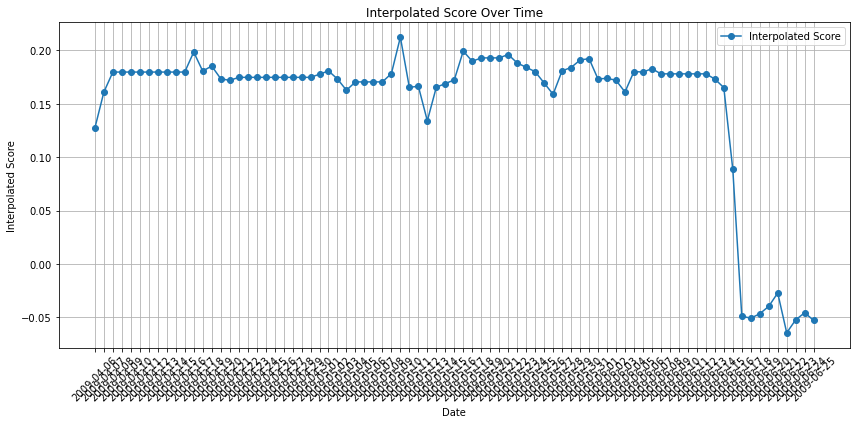

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# PySpark DataFrame'i pandas DataFrame'e dönüştürme
df_interpolated_pd = df_interpolated.toPandas()

# Verileri tarih sırasına göre sırala
df_interpolated_pd = df_interpolated_pd.sort_values(by="date_only")

# Çizgi grafiğini çizme
plt.figure(figsize=(12, 6))
plt.plot(df_interpolated_pd["date_only"], df_interpolated_pd["interpolated_score"], label="Interpolated Score", marker='o')
plt.xlabel("Date")
plt.ylabel("Interpolated Score")
plt.title("Interpolated Score Over Time")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Tarih etiketlerini döndürme
plt.tight_layout()

# Grafiği gösterme veya kaydetme
plt.show()
# Grafiği kaydetmek için:
# plt.savefig("interpolated_score_plot.png")